Exploratory data Analysis on Global Terrorism

In [1]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

Reading the Data

In [3]:
Terror =pd.read_csv('/content/globalterrorismdb_0718dist.csv', encoding='latin-1')
Terror

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,0,NaN,NaN,1,1,1,-9,NaN,NaN,0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34470,198805170003,1988,5,17,NaN,0,NaN,98,Italy,8,Western Europe,Trentino-South Tyrol,Bolzano,46.496714,11.358008,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,1,Business,3.0,Bank/Commerce,Bus Dom.,Bank,...,NaN,NaN,Explosive,0.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
34471,198805170004,1988,5,17,NaN,0,NaN,98,Italy,8,Western Europe,Trentino-South Tyrol,Bolzano,46.496714,11.358008,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,10,Journalists & Media,55.0,Television Journalist/Staff/Facility,RAI (State TV),RAI State TV Regional HQ,...,NaN,NaN,Explosiv

Columns names

In [5]:
Terror.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

Displaying the info of the terror dataset

In [6]:
Terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34475 entries, 0 to 34474
Columns: 135 entries, eventid to related
dtypes: float64(58), int64(20), object(57)
memory usage: 35.5+ MB


Checking for the null values

In [7]:
Terror.isna().sum()

eventid           0
iyear             0
imonth            0
iday              0
approxdate    34452
              ...  
INT_LOG           1
INT_IDEO          1
INT_MISC          1
INT_ANY           1
related       31429
Length: 135, dtype: int64

Renaming the important columns

In [8]:
Terror.rename(columns={'provstate':'State','iyear':'Year','imonth':'Month','city':'City','iday':'Day','country_txt':'Country','region_txt':'Region',
                   'attacktype1_txt':'Attack_type','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary',
                   'gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)


Adding a new column

In [9]:
Terror['Casualities'] = Terror.Killed + Terror.Wounded

Making a new dataset of important columns

In [10]:
Terror_updated = Terror[['Year','Month','Day','Country','State','Region','City','latitude','longitude','Attack_type','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive',"Casualities"]]

Display first 5 rows

In [12]:
Terror_updated.head()

,Year,Month,Day,Country,State,Region,City,latitude,longitude,Attack_type,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,Casualities
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,NaN


Checking null values for the new dataset

In [14]:
Terror_updated.isna().sum()

Year               0
Month              0
Day                0
Country            0
State            131
Region             0
City               0
latitude        1883
longitude       1883
Attack_type        0
Killed          5626
Wounded         7434
Target           372
Summary        33346
Group              0
Target_type        0
Weapon_type        1
Motive         33617
Casualities     7580
dtype: int64

No. of rows and columns

In [15]:
Terror_updated.shape

(34475, 19)

Final Terror Dataset

In [16]:
Terror_Final = Terror_updated.dropna(axis=0)

No. of rows and columns of the Final terror dataset


In [17]:
Terror_Final.shape

(805, 19)

Checking for the duplicated value

In [18]:
Terror_Final.duplicated()

5        False
8        False
9        False
11       False
14       False
         ...  
33828    False
33851    False
33980    False
34051    False
34355    False
Length: 805, dtype: bool

1. The Most Attacked countries , city , region, year, month, group, types

In [19]:
print("Country with the most attacks:",Terror_Final['Country'].value_counts().idxmax())
print("City with the most attacks:",Terror_Final['City'].value_counts().index[0]) #as first entry is 'unknown'
print("Region with the most attacks:",Terror_Final['Region'].value_counts().idxmax())
print("Year with the most attacks:",Terror_Final['Year'].value_counts().idxmax())
print("Month with the most attacks:",Terror_Final['Month'].value_counts().idxmax())
print("Group with the most attacks:",Terror_Final
['Attack_type'].value_counts().idxmax())


Country with the most attacks: United States
City with the most attacks: New York City
Region with the most attacks: North America
Year with the most attacks: 1970
Month with the most attacks: 5
Group with the most attacks: Bombing/Explosion


2. Country - Top 10 countries affected by terror attack

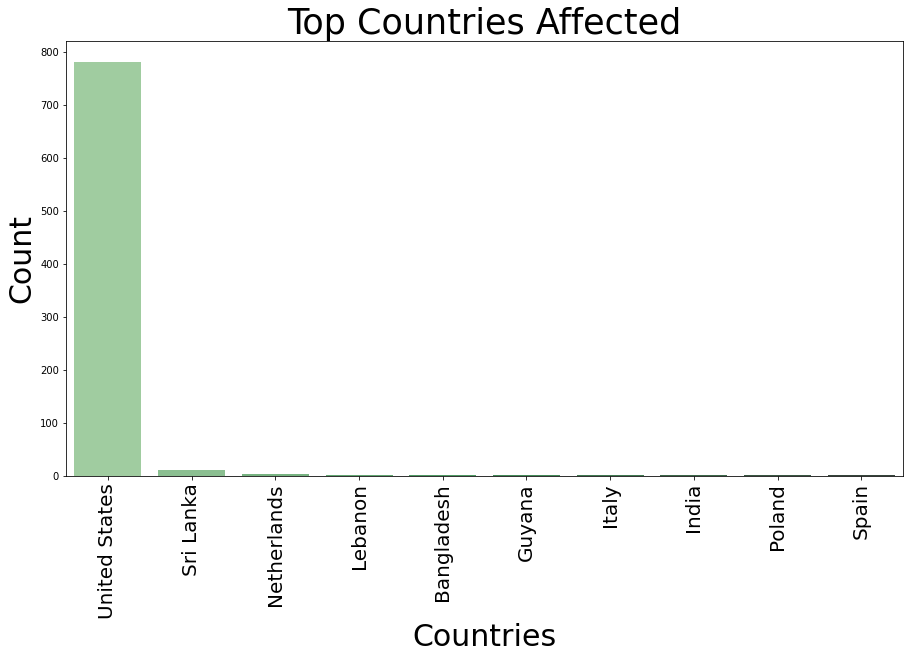

In [20]:
plt.subplots(figsize=(15,8))
sns.barplot(Terror_Final['Country'].value_counts()[:10].index,Terror_Final['Country'].value_counts()[:10].values,palette='Greens_d')
plt.title('Top Countries Affected' , fontsize = 35)
plt.xlabel('Countries' , fontsize = 30)
plt.ylabel('Count' , fontsize = 30)
plt.xticks(rotation= 90 , fontsize = 20)
plt.show()

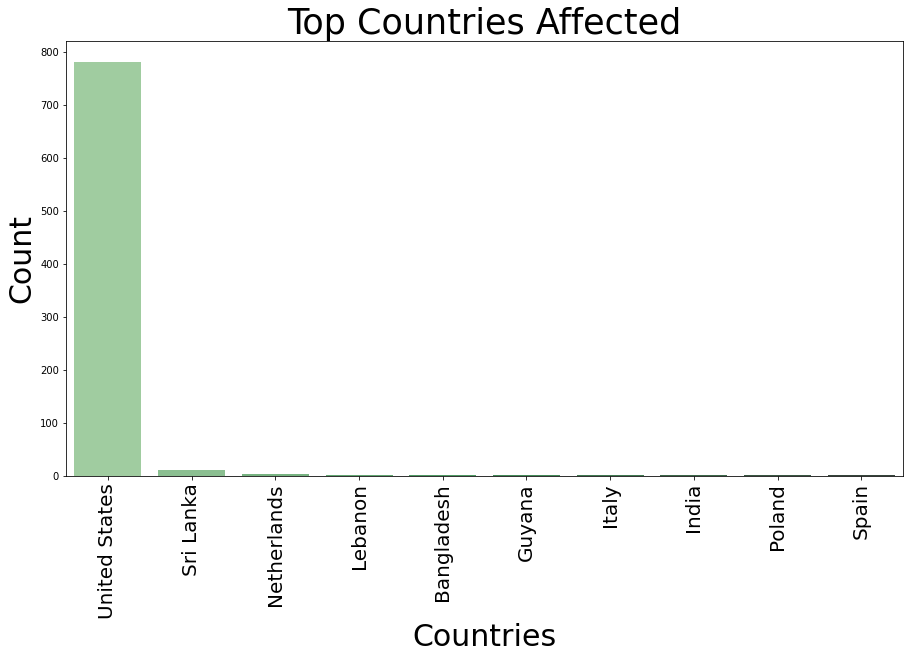

1 . United States ------>
                             781 attacks

2 . Sri Lanka ------>
                             12 attacks

3 . Netherlands ------>
                             3 attacks

4 . Lebanon ------>
                             2 attacks

5 . Bangladesh ------>
                             1 attacks

6 . Guyana ------>
                             1 attacks

7 . Italy ------>
                             1 attacks

8 . India ------>
                             1 attacks

9 . Poland ------>
                             1 attacks

10 . Spain ------>
                             1 attacks



In [21]:
plt.subplots(figsize=(15,8))
sns.barplot(Terror_Final['Country'].value_counts()[:10].index,Terror_Final['Country'].value_counts()[:10].values,palette='Greens_d')
plt.title('Top Countries Affected' , fontsize = 35)
plt.xlabel('Countries' , fontsize = 30)
plt.ylabel('Count' , fontsize = 30)
plt.xticks(rotation= 90 , fontsize = 20)
plt.show()
idx=1
for i in Terror_Final['Country'].value_counts()[0:10].index:
    print(idx,".",i,"------>")
    print("                            ",Terror_Final['Country'].value_counts()[i],"attacks")
    print()
    idx+=1

3. Year - Number of Terrorist Activities each Year

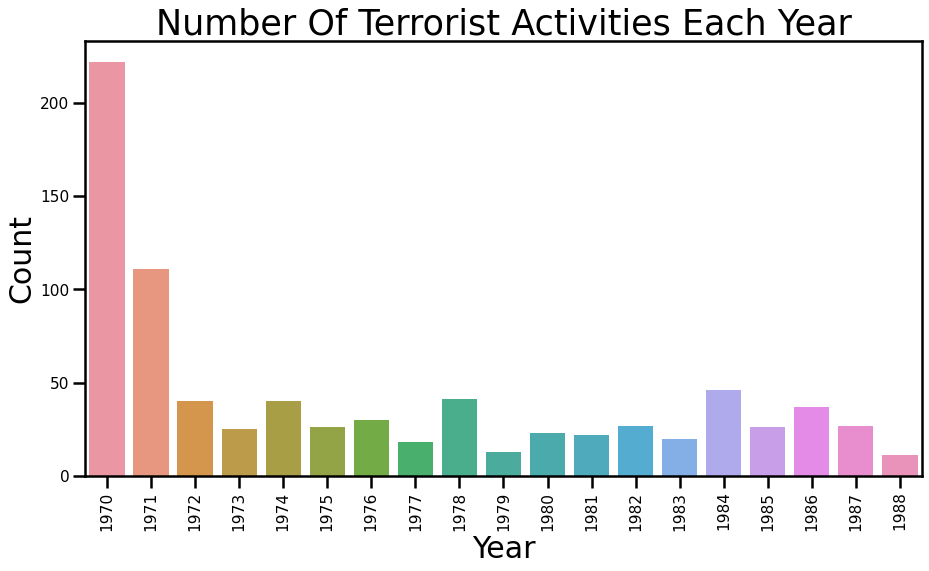

In [22]:
plt.figure(figsize=(15,8))
sns.set_context("poster" , font_scale = 0.7)
sns.countplot(Terror_Final["Year"])
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year' ,fontsize = 35 )
plt.xlabel('Year' , fontsize = 30)
plt.ylabel('Count' , fontsize = 30)
plt.show()

4. Year - Top 10 Affected Years

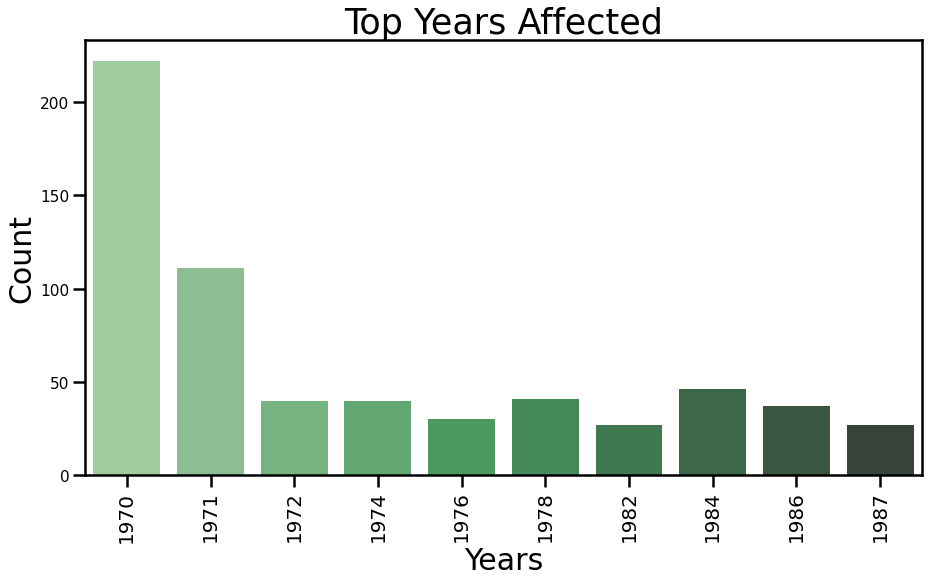

In [23]:
plt.subplots(figsize=(15,8))
sns.barplot(Terror_Final['Year'].value_counts()[:10].index,
            Terror_Final['Year'].value_counts()[:10].values,
            palette='Greens_d')
plt.title('Top Years Affected' , fontsize = 35)
plt.xlabel('Years' , fontsize = 30)
plt.ylabel('Count' , fontsize = 30)
plt.xticks(rotation= 90 , fontsize = 20)
plt.show()

5.Target_type - Counts of attacks on different types of targets

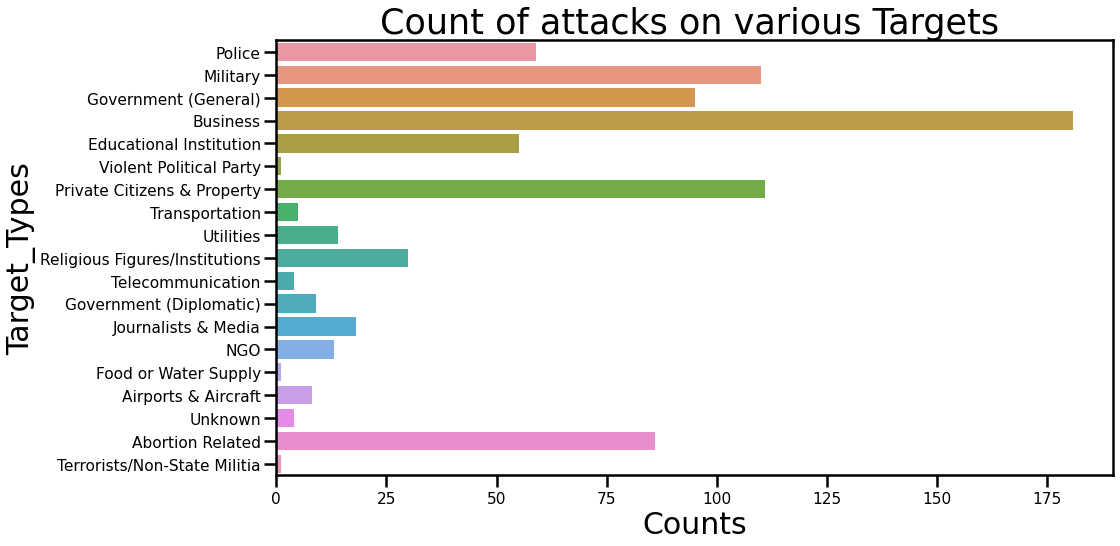

In [24]:
plt.figure(figsize=(15,8))
sns.countplot(y=Terror_Final['Target_type'])
plt.title('Count of attacks on various Targets ' , fontsize = 35)
plt.xlabel('Counts' , fontsize = 30)
plt.ylabel('Target_Types' , fontsize = 30)
plt.show()

6. Weapon Type - counts of weapons used in attacks

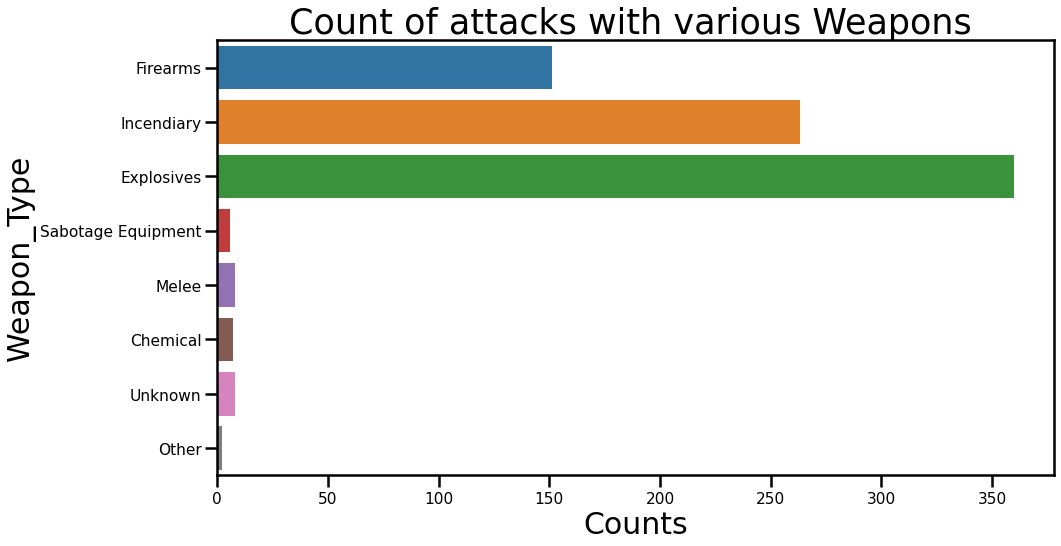

In [25]:
plt.figure(figsize=(15,8))
sns.countplot(y=Terror_Final['Weapon_type'])
plt.title('Count of attacks with various Weapons ' , fontsize = 35)
plt.xlabel('Counts' , fontsize = 30)
plt.ylabel('Weapon_Type', fontsize = 30 )
plt.show()

7.Terrorist Organisations - Top 10

In [26]:
Terror_Final['Group'].value_counts()[:10]

Left-Wing Militants                              119
Anti-Abortion extremists                          72
Black Nationalists                                52
White extremists                                  51
Unknown                                           51
Student Radicals                                  37
Fuerzas Armadas de Liberacion Nacional (FALN)     37
Zebra killers                                     20
Chicano Liberation Front                          19
Macheteros                                        18
Name: Group, dtype: int64

8.Most affected Regions Across the Globe

In [27]:
Terror_Final["Region"].value_counts()

North America                 781
South Asia                     14
Western Europe                  6
Middle East & North Africa      2
South America                   1
Eastern Europe                  1
Name: Region, dtype: int64

9.Most Active Terrorist Organization

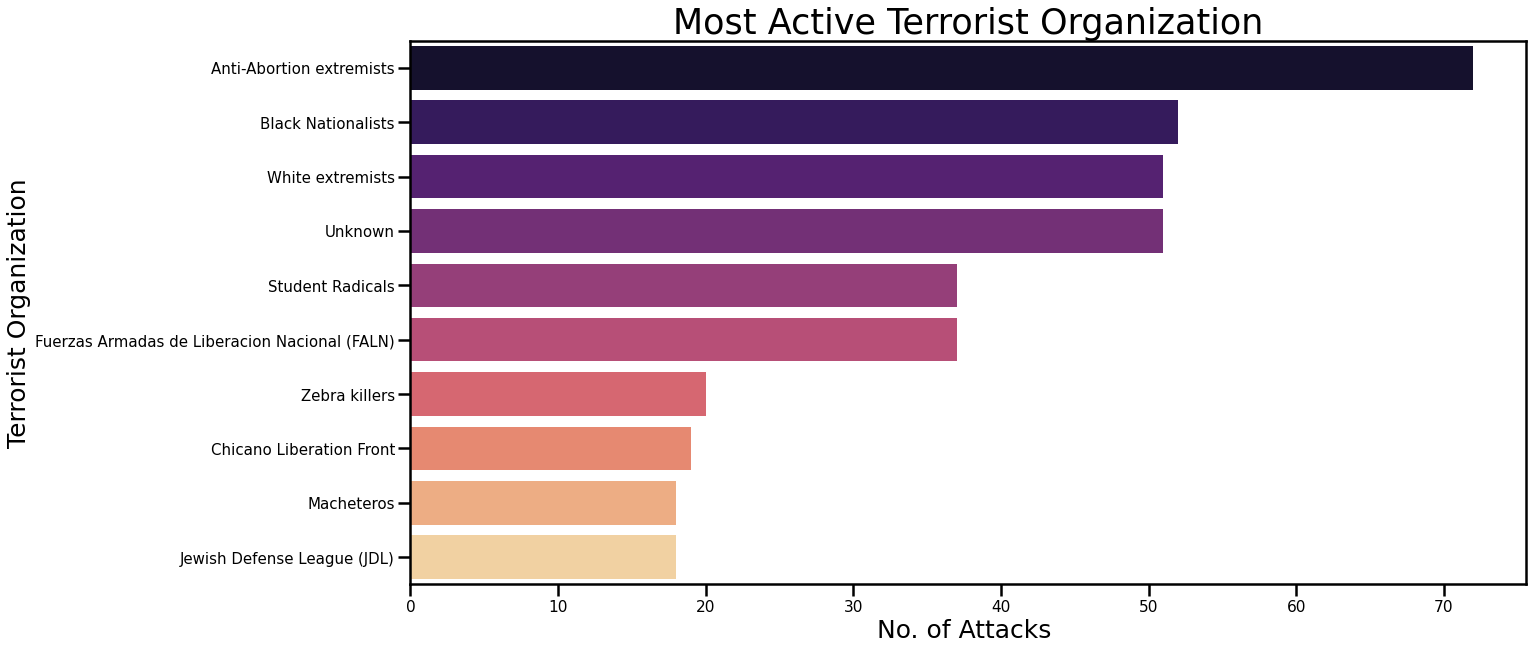

In [29]:
fig=plt.figure(figsize=(20,10))
sns.barplot(x=Terror_Final['Group'].value_counts()[1:11].values,
            y=Terror_Final['Group'].value_counts()[1:11].index,
            palette='magma')
plt.yticks(size=15)
plt.xlabel("No. of Attacks ",fontsize=25)
plt.ylabel("Terrorist Organization",fontsize=25)
plt.title("Most Active Terrorist Organization",fontsize=35)
plt.show()
fig.savefig('Most Active Terrorist Oraganization',bbox_inches='tight')

In [30]:
idx=1
print("                         Most Active Terror Organizations")
for i in Terror_Final['Group'].value_counts()[1:6].index:
    print(idx,".",i,"---->")                                                                  
    print("                                                     ",Terror_Final['Group'].value_counts()[i],"attacks")
    print()
    idx+=1

                         Most Active Terror Organizations
1 . Anti-Abortion extremists ---->
                                                      72 attacks

2 . Black Nationalists ---->
                                                      52 attacks

3 . White extremists ---->
                                                      51 attacks

4 . Unknown ---->
                                                      51 attacks

5 . Student Radicals ---->
                                                      37 attacks



10.Number of Casuality Due to Terror attacks

In [31]:
lis=[]
total=[]
for i in Terror_Final['Country'].value_counts().index:
    Total = Terror_Final.loc[Terror_Final['Country'] == i, 'Casualities'].sum()
    lis.append([i,Total])

In [32]:
lis=sorted(lis,key=lambda x:x[1],reverse=True)
print(*lis[:20])   #country wise casuality over the years from 1970 to 2017

['United States', 386.0] ['Sri Lanka', 142.0] ['Netherlands', 11.0] ['Bangladesh', 8.0] ['Guyana', 5.0] ['India', 4.0] ['Spain', 3.0] ['Sweden', 2.0] ['Italy', 1.0] ['Lebanon', 0.0] ['Poland', 0.0]


11.Country vs Casuality

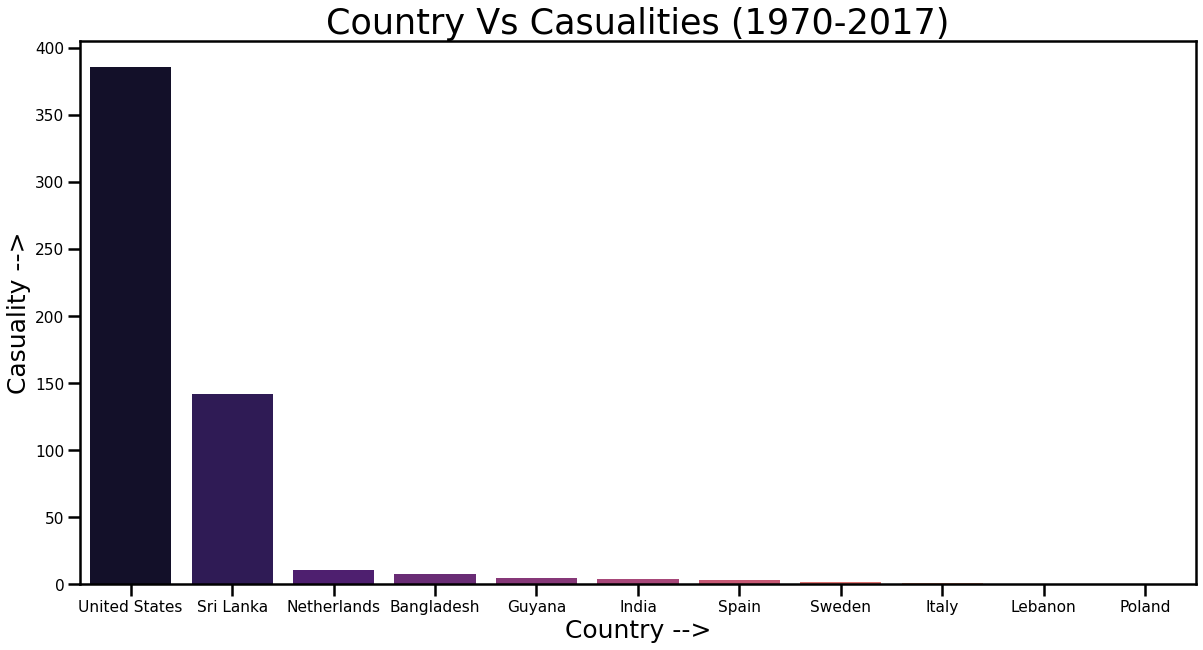

In [33]:
country=[]
casuality=[]
for i in lis[:11]:
    country.append(i[0])
    casuality.append(i[1])
#print(country)
#print(casual)
fig=plt.figure(figsize=(20,10))
plt.title("Country Vs Casualities (1970-2017)",fontsize=35)
plt.xlabel("Country -->",size=25)
plt.ylabel("Casuality -->",size=25)
sns.barplot(x=country,y=casuality,palette='magma')
plt.show()
fig.savefig('Country Vs Casuality From 1970 to 2017',bbox_inches='tight')

12.Terrorist Activities by Region in each Year through Area Plot

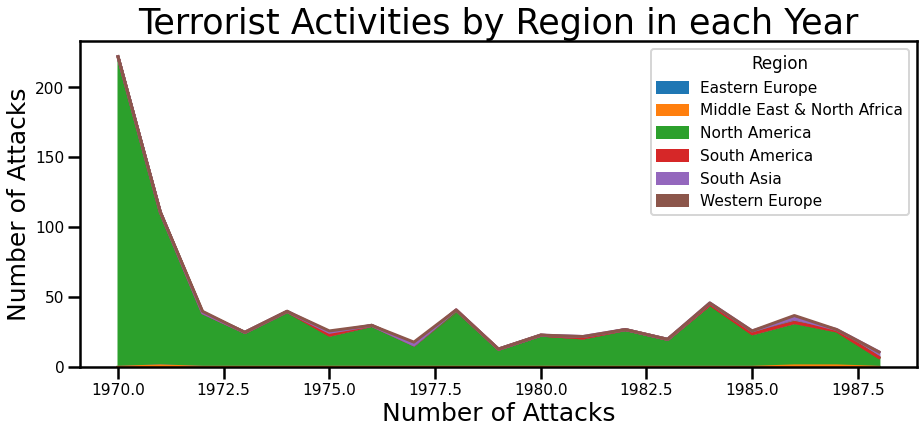

In [34]:
pd.crosstab(Terror_Final.Year, Terror_Final.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year', size = 35)
plt.xlabel('Number of Attacks' , size = 25)
plt.ylabel('Number of Attacks', size = 25)
plt.show()

Conclusions:
(1) The Most Attacked countries , city , region, year, month, group, types.

(2) Top 10 countries affected by terror attack

(3) Number of Terrorist Activities each Year

(4) Top 10 Affected Years

(5) Counts of attacks on different types of targets

(6) Counts of weapons used in attacks

(7) Top 10 Terrorist Organisations

(8) Most affected Regions Across the Globe

(9) Most Active Terrorist Organization

(10) Number of Casuality Due to Terror attacks

(11) Country vs Casuality
(12) Terrorist Activities by Region in each Year through Area Plot